# `WHAT DO WE GOTTA SOLVE ANYWAY?`
<BR>

**Visualization and develop a predictive model that determines the likelihood of a startup being either acquired or closed, based on various factors such as the startup's domain, funding history, industry category, and other relevant features.**

**The sign "#" is a comment, so it won't be executed.
If you don't understand a line just read the comment!**

In [ ]:
import pandas as pd #importing pandas as pd (a short name for pandas, so we don't have to type much)
import matplotlib.pyplot as plt #same thing but now with matplot
import seaborn as sb #for better visuals

**`NOW LET'S IMPORT OUR DATA SET!!!!!!!!!!!!!!!`**

In [ ]:
df = pd.read_csv('start.csv') #df means dataframe, which we gotta import from the csv file that we got.

In [ ]:
pd.set_option('display.max_columns', None) # just seeing all the cols
df #just prints the entire data set

,name,status_encoded,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,Bandsintown,1,2007-01-01,0,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,acquired
1,TriCipher,1,2000-01-01,0,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,acquired
2,Plixi,1,2009-03-18,0,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,acquired
3,Solidcore Systems,1,2002-01-01,0,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,acquired
4,Inhale Digital,0,2010-08-01,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,CoTweet,1,2009-01-01,0,7/9/2009,7/9/2009,0.5178,0.5178,0.5808,4.5260,9,1,1100000,2,1,0,0,0,0,advertising,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,6.0000,1,acquired
919,Reef Point Systems,0,1998-01-01,6/25/2008,4/1/2005,3/23/2007,7.2521,9.2274,6.0027,6.0027,1,3,52000000,1,0,0,1,0,0,security,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,2.6667,1,closed
920,Paracor Medical,0,1999-01-01,6/17/2012,6/29/2007,6/29/2007,8.4959,8.4959,9.0055,9.0055,5,1,44000000,1,1,0,0,0,0,biotech,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,8.0000,1,closed
921,Causata,1,2009-01-01,0,10/5/2009,11/1/2011,0.7589,2.8329,0.7589,3.8356,12,2,15500000,2,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1.0000,1,acquired


In [ ]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.drop("Unnamed: 6", axis=1, inplace=True)
df.drop('id', axis=1, inplace=True)
df.drop("object_id", axis=1, inplace=True)
#deleting all the cols which I think is not needed

In [ ]:
df.category_code

0            music
1       enterprise
2              web
3         software
4      games_video
          ...     
918    advertising
919       security
920        biotech
921       software
922       security
Name: category_code, Length: 923, dtype: object

***Now Understand the dataset and what they mean. Should have done this earlier huh!***

    age_first_funding_year – quantitative
    age_last_funding_year – quantitative
    relationships – quantitative
    funding_rounds – quantitative
    funding_total_usd – quantitative
    milestones – quantitative
    age_first_milestone_year – quantitative
    age_last_milestone_year – quantitative
    state – categorical
    industry_type – categorical
    has_VC – categorical
    has_angel – categorical
    has_roundA – categorical
    has_roundB – categorical
    has_roundC – categorical
    has_roundD – categorical
    avg_participants – quantitative
    is_top500 – categorical
    status(acquired/closed) – categorical (the target variable, if a startup is ‘acquired’ by some other organization, means the startup succeed)

In [ ]:
df.columns #look at the columns

Index(['state_code', 'latitude', 'longitude', 'zip_code', 'city', 'name',
       'labels', 'founded_at', 'closed_at', 'first_funding_at',
       'last_funding_at', 'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'state_code.1',
       'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate', 'category_code',
       'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB',
       'has_roundC', 'has_roundD', 'avg_participants', 'is_top500', 'status'],
      dtype='object')

In [ ]:
df.shape #Just the shape with rows and col.

(923, 45)

In [ ]:
df.isnull().sum()

state_code                    0
latitude                      0
longitude                     0
zip_code                      0
city                          0
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_advertising                0
is_games

In [ ]:
df.status.value_counts()

acquired    597
closed      326
Name: status, dtype: int64

In [ ]:
#All these cols have already been One Hotted
df.drop("state_code.1", axis=1, inplace=True)
#df.drop("state_code", axis=1, inplace=True )
df.drop("city", axis=1, inplace=True)
df.drop("latitude", axis=1, inplace=True)
df.drop("longitude", axis=1, inplace=True)
df.drop("zip_code", axis=1, inplace=True)


In [ ]:
df.category_code.value_counts().nunique()

22

In [ ]:
df.closed_at.fillna(0, inplace=True)

In [ ]:
"""age_first_milestone_year    152
age_last_milestone_year     152
"""
df.age_first_funding_year.fillna(0, inplace=True)
df.age_last_milestone_year.fillna(0, inplace=True)
df.age_first_milestone_year.fillna(0, inplace=True)

In [ ]:
df.rename(columns={'labels':"status_encoded"}, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      923 non-null    object 
 1   status_encoded            923 non-null    int64  
 2   founded_at                923 non-null    object 
 3   closed_at                 923 non-null    object 
 4   first_funding_at          923 non-null    object 
 5   last_funding_at           923 non-null    object 
 6   age_first_funding_year    923 non-null    float64
 7   age_last_funding_year     923 non-null    float64
 8   age_first_milestone_year  923 non-null    float64
 9   age_last_milestone_year   923 non-null    float64
 10  relationships             923 non-null    int64  
 11  funding_rounds            923 non-null    int64  
 12  funding_total_usd         923 non-null    int64  
 13  milestones                923 non-null    int64  
 14  is_CA     

# **Do visualization and develop a predictive model that determines the likelihood of a startup being either acquired or closed, based on various factors such as the startup's domain, funding history, industry category, and other relevant features.**

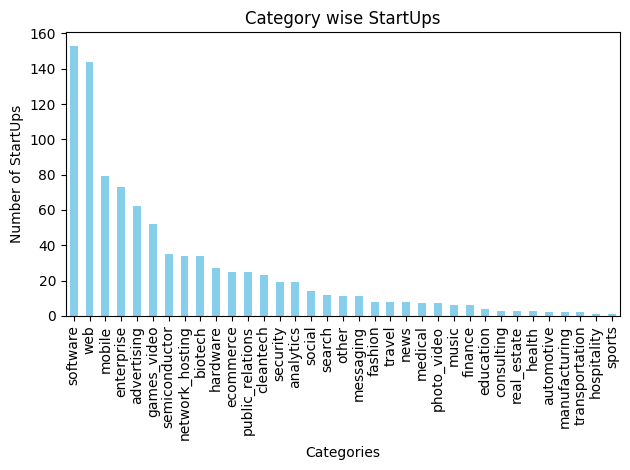

In [ ]:
#finding all the category of startups
category_counts = df['category_code'].value_counts()
top_categories = category_counts
top_categories.plot(kind='bar', color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Number of StartUps')
plt.title('Category wise StartUps')
plt.tight_layout()
plt.show()

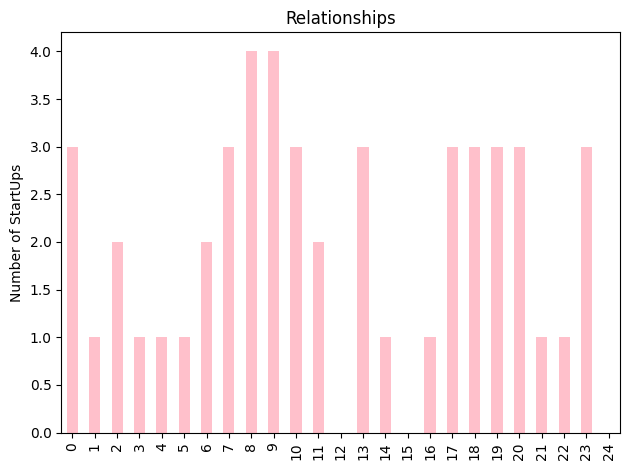

In [ ]:
df.milestones.head(25).plot(kind='bar', color='pink')
#plt.xlabel('Number of Relationships')
plt.ylabel('Number of StartUps')
plt.title('Relationships')
plt.tight_layout()
plt.show()

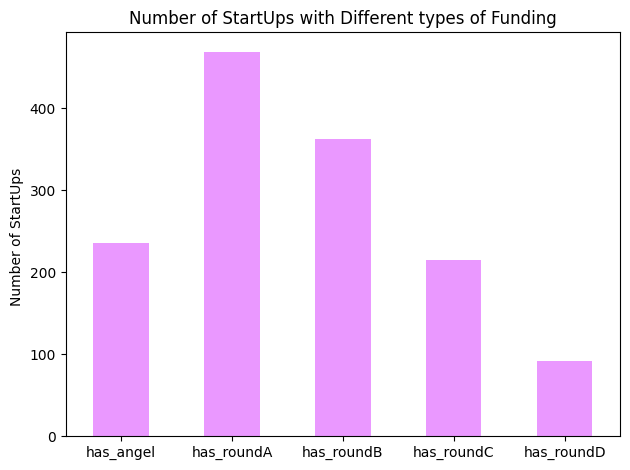

In [ ]:
funding_rounds = df[['has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD']].sum()


funding_rounds.plot(kind='bar', color='#d633ff', alpha=0.5)
#plt.xlabel('Funding Round')
plt.ylabel('Number of StartUps ')
plt.title('Number of StartUps with Different types of Funding')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

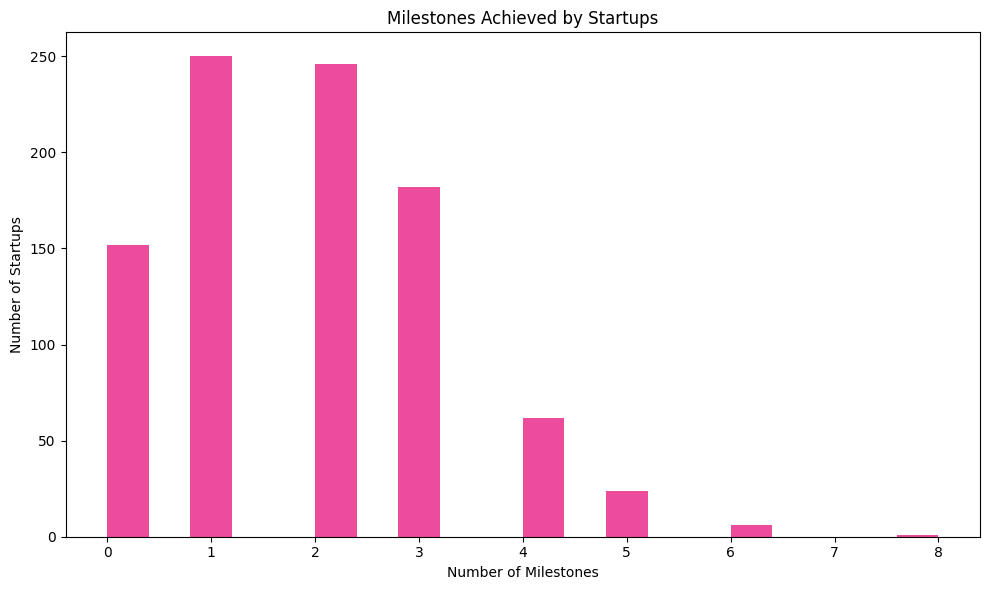

In [ ]:

# Create a histogram of milestones
plt.figure(figsize=(10, 6))
plt.hist(df['milestones'], bins=20, color='#e60073', alpha=0.7)
plt.xlabel('Number of Milestones')
plt.ylabel('Number of Startups')
plt.title('Milestones Achieved by Startups')
plt.tight_layout()

# Show the chart
plt.show()

In [ ]:
df.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

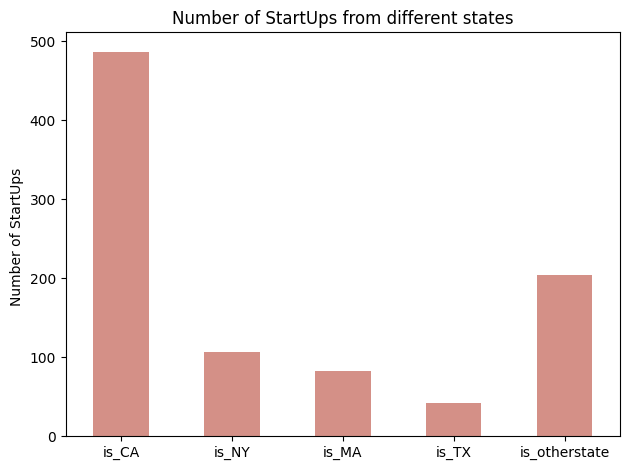

In [ ]:
features_state = df[['is_CA', 'is_NY','is_MA', 'is_TX', 'is_otherstate']].sum()

features_state.plot(kind='bar', color='#a210', alpha=0.5)
#plt.xlabel('Funding Round')
plt.ylabel('Number of StartUps ')
plt.title('Number of StartUps from different states')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

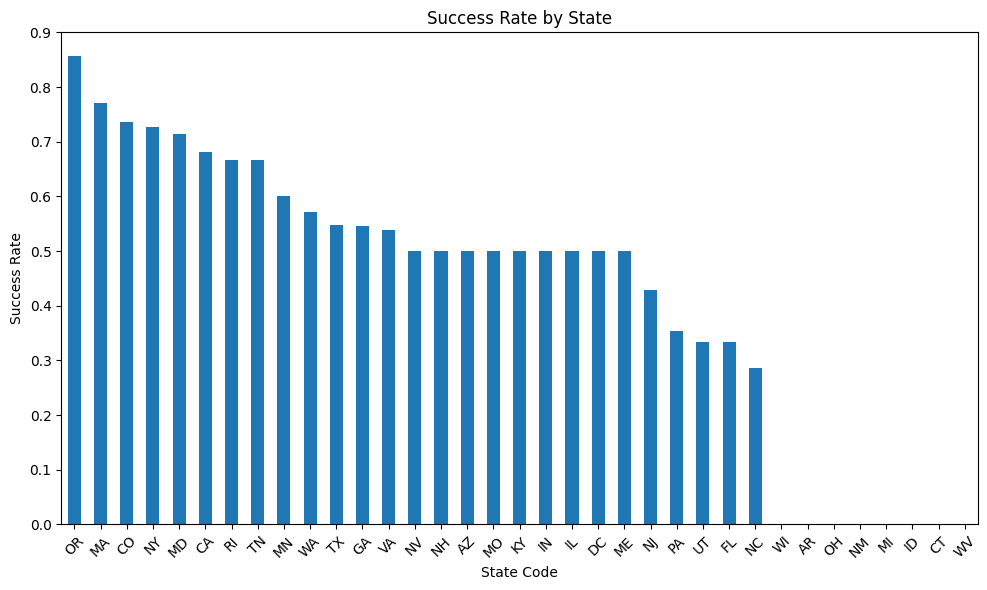

In [ ]:
# Assuming df is your DataFrame
success_by_state = df.groupby('state_code')['status_encoded'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
success_by_state.plot(kind='bar')
plt.title('Success Rate by State')
plt.xlabel('State Code')
plt.ylabel('Success Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df.is_top500.value_counts()

1    747
0    176
Name: is_top500, dtype: int64

<ipython-input-3-07c6001a2d3e>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[featured].corr()


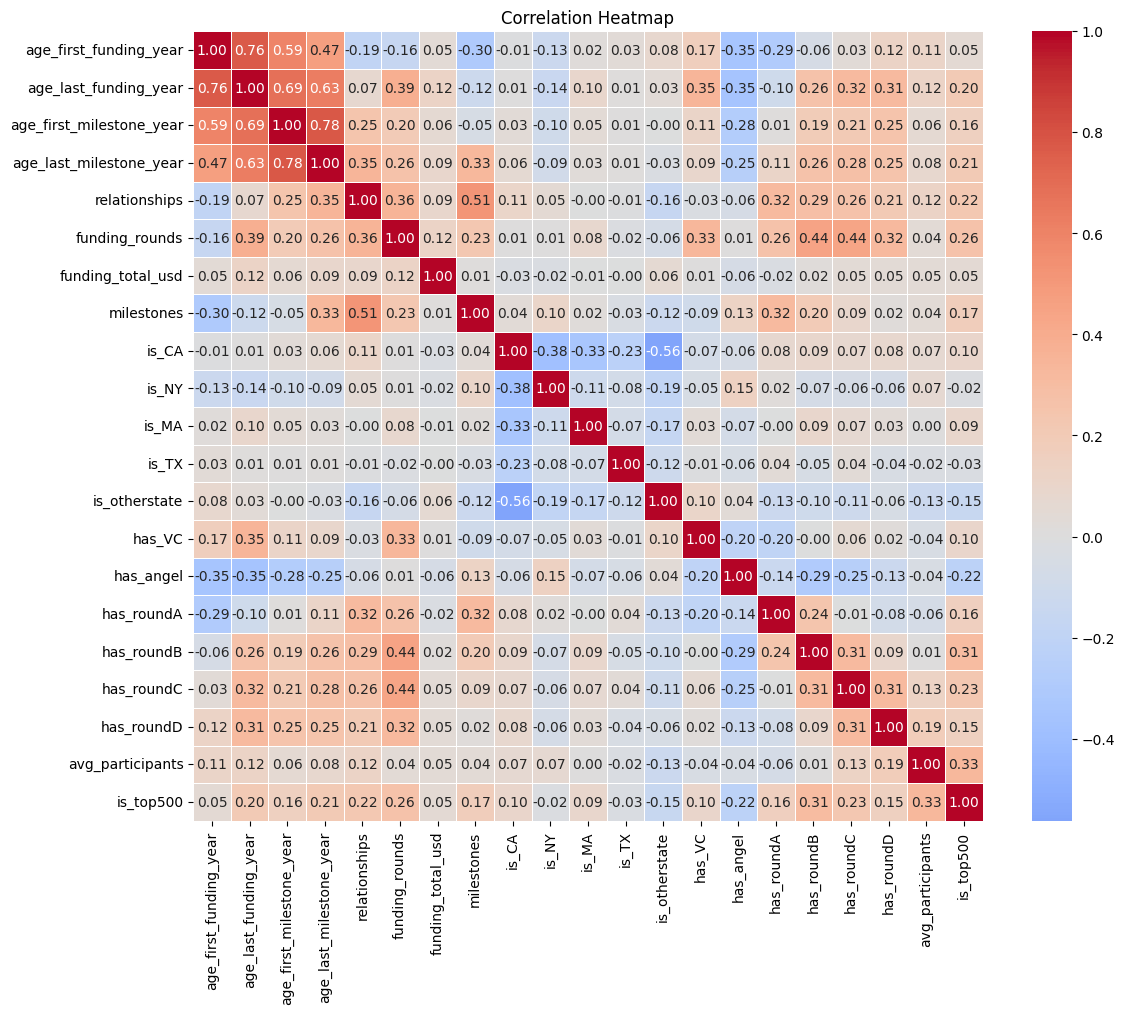

In [ ]:
featured = ['founded_at', 'closed_at', 'first_funding_at',
       'last_funding_at', 'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB',
       'has_roundC', 'has_roundD', 'avg_participants', 'is_top500']

# Create a correlation matrix for the selected columns
correlation_matrix = df[featured].corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(12, 10))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True,  fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.tight_layout()


# Show the plot

plt.show()

In [ ]:
#from pandas_profiling import ProfileReport as pp

In [ ]:
#profile = pp(df, title="this", html={'style':{'full_width':False}})

In [ ]:
#profile.to_notebook_iframe()

In [ ]:
#profile.to_file(output_file="reported.html")

# The Real Deal

In [ ]:
#importing ML libs
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# features to use for prediction
features = ['age_first_funding_year', 'age_last_funding_year', 'funding_total_usd', 'is_CA', 'is_NY', 'is_MA',
            'is_TX', 'is_otherstate', 'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising', 'is_gamesvideo',
            'is_ecommerce', 'is_biotech', 'is_consulting', 'is_othercategory', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB',
            'has_roundC', 'has_roundD', 'avg_participants', 'is_top500']

# Create a new column 'success' where 'Acquired' is 1 and 'Closed' is 0
df['success'] = df['status_encoded'].apply(lambda x: 1 if x == 1 else 0)

# Select features and target variable
X = df[features]
y = df['success']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict the success status on the test set
y_pred = model.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)


# **Printing with each Actual Results to compare with**

In [ ]:
#importing again if someone forgets to run the above
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# Select the features you want to use for prediction
features = ['age_first_funding_year', 'age_last_funding_year', 'funding_total_usd', 'is_CA', 'is_NY', 'is_MA', 'is_TX',
            'is_otherstate', 'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising', 'is_gamesvideo',
            'is_ecommerce', 'is_biotech', 'is_consulting', 'is_othercategory', 'has_VC', 'has_angel', 'has_roundA',
            'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants', 'is_top500']

# Create a new column 'success' where 'Acquired' is 1 and 'Closed' is 0
df['success'] = df['status_encoded'].apply(lambda x: 1 if x == 1 else 0)

# features and target variable
X = df[features]
y = df['success']

# Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict the success status on the test set
y_pred = model.predict(X_test)

# Print each test data point, predicted result, and actual result
for i in range(len(X_test)):
    print(f"Test Data: {X_test.iloc[i]}")
    print(f"Predicted Result: {'Acquired' if y_pred[i] == 1 else 'Closed'}")
    print(f"Actual Result: {'Acquired' if y_test.iloc[i] == 1 else 'Closed'}")
    print("=" * 30)

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)


#`Giving Random Data to test`

In [ ]:
new_data_success = {
    'age_first_funding_year': 2,
    'age_last_funding_year': 5,
    'funding_total_usd': 8000000,
    'is_CA': 1,
    'is_NY': 0,
    'is_MA': 0,
    'is_TX': 0,
    'is_otherstate': 0,
    'is_software': 0,
    'is_web': 0,
    'is_mobile': 0,
    'is_enterprise': 0,
    'is_advertising': 0,
    'is_gamesvideo': 0,
    'is_ecommerce': 0,
    'is_biotech': 0,
    'is_consulting': 0,
    'is_othercategory': 1,
    'has_VC': 1,
    'has_angel': 1,
    'has_roundA': 1,
    'has_roundB': 1,
    'has_roundC': 0,
    'has_roundD': 0,
    'avg_participants': 1,
    'is_top500': 0
}


# Convert the new data into a DataFrame
new_df = pd.DataFrame([new_data_success])

# Use the trained model to predict the outcome for the new data
predicted_result = model.predict(new_df)

# Interpret the prediction
if predicted_result[0] == 1:
    print("The startup is predicted to be Acquired.")
else:
    print("The startup is predicted to be Closed.")


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Select the features you want to use for prediction
features = ['age_first_funding_year', 'age_last_funding_year', 'funding_total_usd', 'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate', 'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting', 'is_othercategory', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants', 'is_top500']

# LOL we forgot to spell correctly
df['success'] = df['status_encoded'].apply(lambda x: 1 if x == 1 else 0)

# Select features and target variable
X = df[features]
y = df['success']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)

# Create and train a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict the success status on the test set
y_pred = model.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)
